In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis = 1)
y = data['median_house_value']

In [7]:
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2) 

In [8]:
train_data = X_train.join(y_train)

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20003,-119.19,36.06,29.0,1815.0,376.0,1421.0,339.0,1.9091,INLAND,71300.0
15432,-117.25,33.20,22.0,2361.0,618.0,1472.0,596.0,2.0625,<1H OCEAN,124500.0
12093,-117.40,33.76,8.0,1954.0,330.0,973.0,321.0,4.4875,INLAND,249100.0
2600,-123.63,41.11,19.0,1797.0,384.0,1033.0,327.0,1.4911,<1H OCEAN,59200.0
1138,-121.56,39.69,8.0,2836.0,522.0,1163.0,512.0,3.1300,INLAND,168300.0
...,...,...,...,...,...,...,...,...,...,...
19706,-121.67,39.18,26.0,2121.0,375.0,1125.0,366.0,3.3958,INLAND,94600.0
4340,-118.29,34.08,23.0,1864.0,937.0,2795.0,858.0,1.8495,<1H OCEAN,212500.0
14180,-117.06,32.72,31.0,2669.0,514.0,1626.0,499.0,3.1923,NEAR OCEAN,116900.0
8458,-118.36,33.91,36.0,2064.0,474.0,1366.0,421.0,4.1000,<1H OCEAN,243100.0


In [10]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

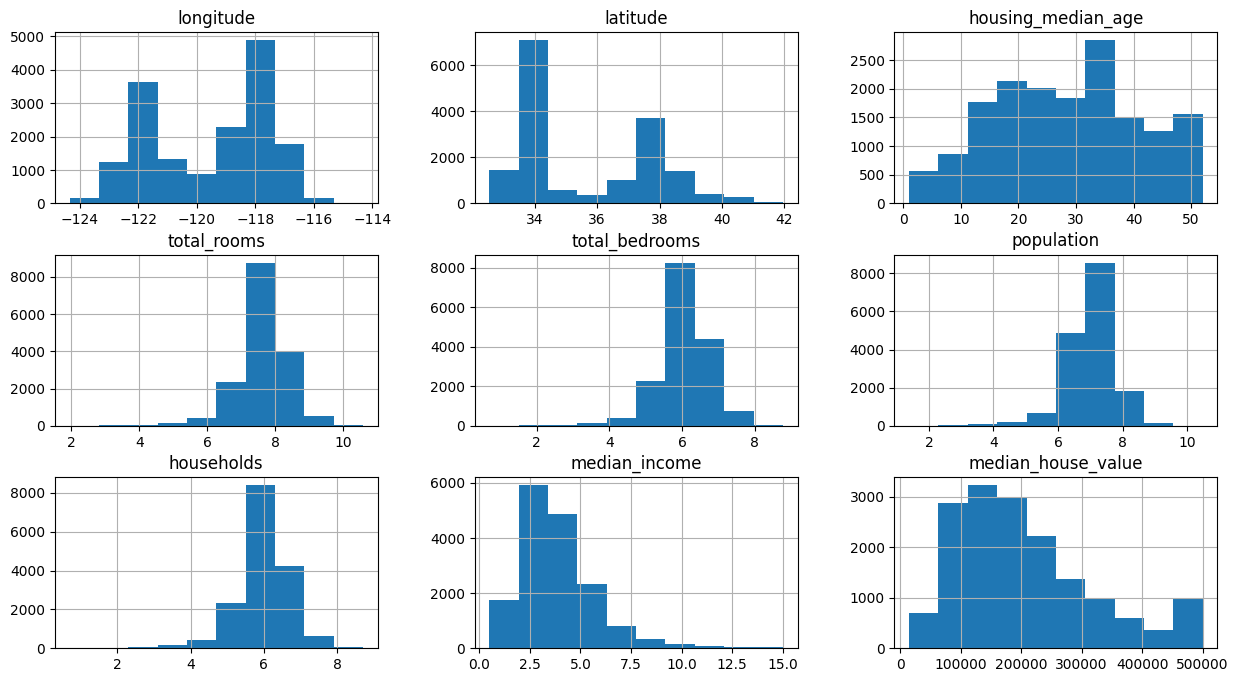

In [11]:
train_data.hist(figsize=(15,8))

In [12]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7204
INLAND        5224
NEAR OCEAN    2140
NEAR BAY      1774
ISLAND           4
Name: count, dtype: int64

In [12]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis =1)

In [13]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

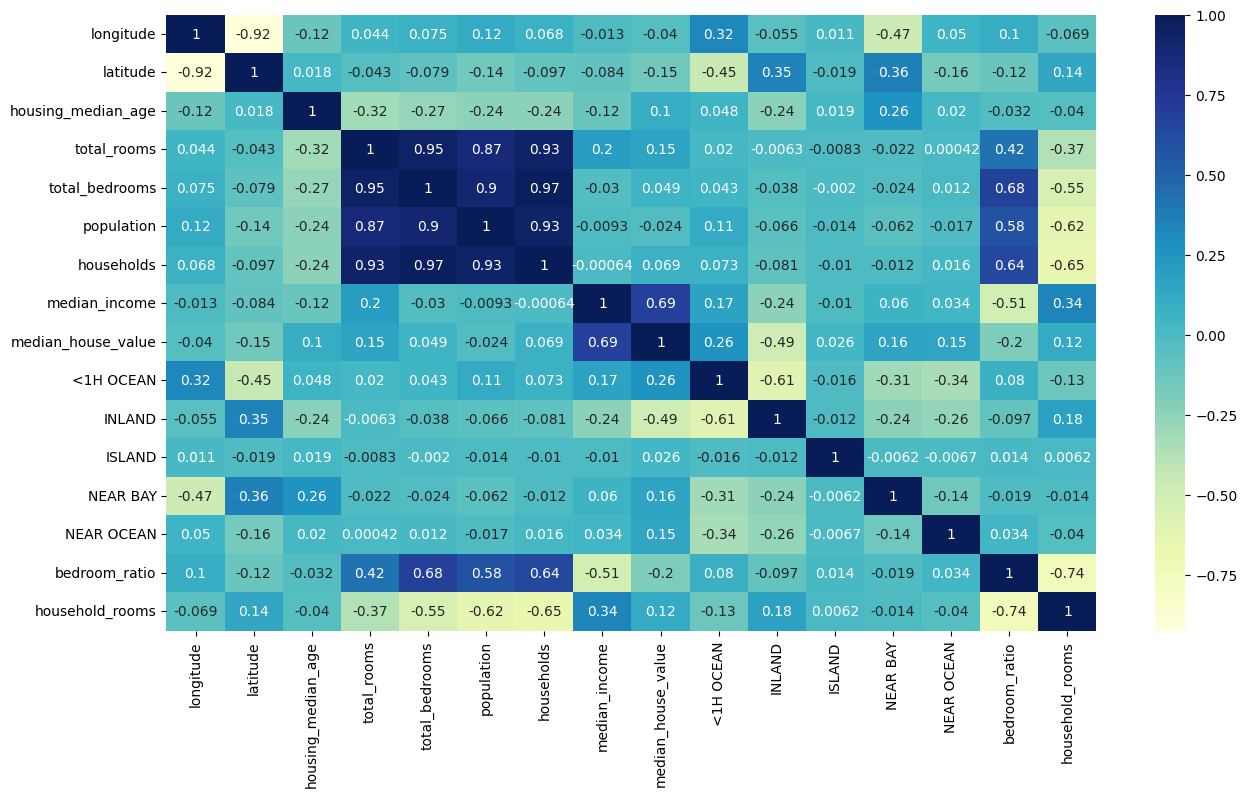

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot = True,cmap = 'YlGnBu')

In [15]:
from sklearn.linear_model import LinearRegression

X_train , y_train = train_data.drop(['median_house_value'],axis =1),train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']


In [17]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis =1)

In [21]:
test_data = test_data.reindex(columns=train_data.columns,fill_value=0)

In [25]:
X_test , y_test = test_data.drop(['median_house_value'],axis =1),test_data['median_house_value']



In [26]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14650,-117.20,32.77,31.0,7.577122,6.156979,6.842683,6.137727,2.8621,196900.0,0,0,0,0,1,0.812575,1.234516
7403,-118.23,33.95,27.0,6.224558,4.962845,6.672033,5.123964,0.9518,91400.0,1,0,0,0,0,0.797301,1.214794
15679,-122.43,37.80,52.0,6.914731,5.529429,5.857933,5.455321,3.2235,500000.0,0,0,0,1,0,0.799659,1.267520
3540,-118.49,34.26,25.0,9.034796,7.535297,8.408271,7.466228,3.5497,261300.0,1,0,0,0,0,0.834031,1.210088
14645,-117.19,32.77,30.0,7.918629,6.463029,8.066521,6.489205,3.7650,238000.0,0,0,0,0,1,0.816180,1.220277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18604,-122.11,37.11,46.0,7.597898,6.003887,6.746412,5.793014,5.2080,206800.0,0,0,0,0,1,0.790204,1.311562
20497,-118.70,34.30,23.0,7.948738,6.008813,7.158514,5.976351,6.1383,244100.0,1,0,0,0,0,0.755946,1.330032
15830,-122.43,37.75,52.0,7.807917,6.230481,6.920672,6.165418,4.0568,387900.0,0,0,0,1,0,0.797970,1.266405
8172,-118.12,33.80,36.0,7.137278,5.327876,6.274762,5.356586,5.3701,251400.0,1,0,0,0,0,0.746486,1.332430


In [27]:
reg.score(X_test,y_test)

0.6938039792062782

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators = 400,
    max_depth = 20,
    min_samples_split = 10,
    min_samples_leaf = 4,
    random_state = 42
)

forest.fit(X_train,y_train)


,n_estimators,400
,criterion,'squared_error'
,max_depth,20
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
forest.score(X_test,y_test)

0.8298593112472894

In [30]:
import pickle

with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(forest, f)


In [31]:
print(forest.feature_names_in_)


['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income' '<1H OCEAN'
 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN' 'bedroom_ratio'
 'household_rooms']
